In [76]:
##This code uses the file"Hw_StackAE_FashionMNIST" 
#provided in class as a baseline

#all necessary inputs
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import math

#load data
dirpath='/Users/anuli/Documents/UTKFace/'
allimages=os.listdir(dirpath)

#data pre-processing
race=[]
images=[]
for Y in range(len(allimages)):
    demos = allimages[Y].split('_')
    if(int(demos[2])!=4):
        images.append(allimages[Y])
        race.append(int(demos[2]))
                    

df = pd.DataFrame()
df['image'], df['race']= images, race
df.head()


23705
22013


,image,race
0,9_1_2_20161219204347420.jpg.chip.jpg,2
1,36_0_1_20170117163203851.jpg.chip.jpg,1
2,86_1_0_20170120225751953.jpg.chip.jpg,0
3,26_1_0_20170116171048641.jpg.chip.jpg,0
4,1_1_2_20161219154612988.jpg.chip.jpg,2


In [77]:
#extraction function
def extract(images):

    features = []

    for img in images:
        pic = Image.open(dirpath+img)
        pic = ImageOps.grayscale(pic)
        pic = pic.resize((128,128))
        pic = np.array(pic)
        features.append(pic)
    features = np.array(features)
    features = features.reshape(len(features), 16384)
    return features

In [78]:
features = extract(df['image'])

In [79]:
race=np.array(df['race']).astype(float)
input_shape = (128,128,1)

#train/test split
x_train, x_test, y_train, y_test = train_test_split(features, race, train_size=0.7,  stratify = race, shuffle = True, random_state=2)
print(x_train.shape)
print(x_test.shape)

(15409, 16384)
(6604, 16384)


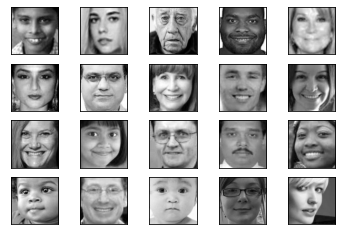

In [80]:
#image examples
for i in range(20):
  X_img = x_train[i].reshape(128,128)
  plt.subplot(4,5,i+1)
  fig = plt.imshow(X_img,cmap='gray')
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

plt.show()  

#standardization
x_train = (x_train.astype('float32')/255).reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = (x_test.astype('float32')/255).reshape((len(x_test), np.prod(x_test.shape[1:])))

In [81]:
#size of hidden layer given in class example
np.random.seed(0)
hiddenSize1 = 100

In [82]:
#autoencoder using class example as a baseline
in_size = 16384
in_img = keras.Input(shape=(in_size,))
encoded = layers.Dense(hiddenSize1, activation='sigmoid',name='Encoder')(in_img) # Encoder Layer
decoded = layers.Dense(in_size, activation='sigmoid', name = 'Decoder')(encoded)  # decoder layer

#create models
autoencoder = keras.Model(in_img, decoded)
encoder = keras.Model(in_img, encoded)

#using optimizer, loss, and fit from class example
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
61/61 [==============================] - 6s 89ms/step - loss: 0.0475
Epoch 2/50
61/61 [==============================] - 5s 79ms/step - loss: 0.0424
Epoch 3/50
61/61 [==============================] - 5s 80ms/step - loss: 0.0381
Epoch 4/50
61/61 [==============================] - 5s 78ms/step - loss: 0.0349
Epoch 5/50
61/61 [==============================] - 5s 78ms/step - loss: 0.0322
Epoch 6/50
61/61 [==============================] - 5s 80ms/step - loss: 0.0304
Epoch 7/50
61/61 [==============================] - 5s 77ms/step - loss: 0.0289
Epoch 8/50
61/61 [==============================] - 5s 85ms/step - loss: 0.0279
Epoch 9/50
61/61 [==============================] - 5s 89ms/step - loss: 0.0272
Epoch 10/50
61/61 [==============================] - 5s 88ms/step - loss: 0.0264
Epoch 11/50
61/61 [==============================] - 5s 79ms/step - loss: 0.0259
Epoch 12/50
61/61 [==============================] - 5s 80ms/step - loss: 0.0253
Epoch 13/50
61/61 [==================

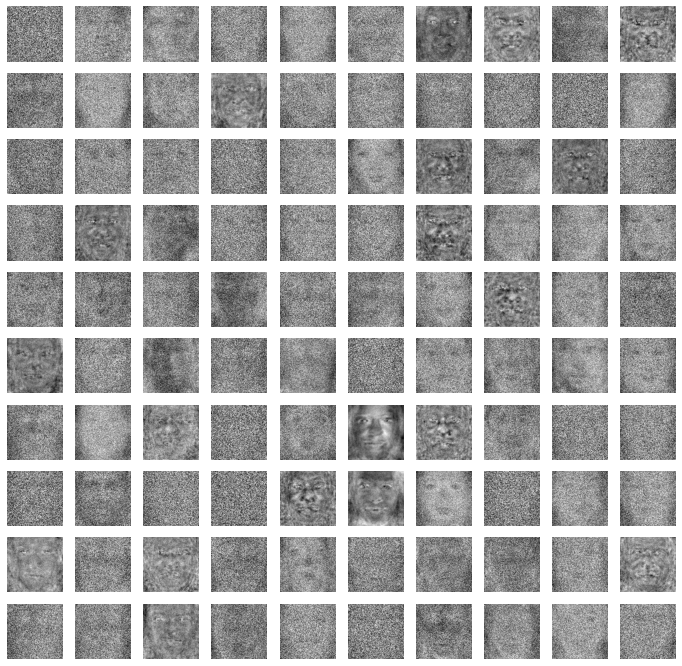

In [84]:
n_cols = hiddenSize1 / 10
fig = plt.figure(figsize=(12,12))


for i in range(hiddenSize1):
  w = autoencoder.layers[1].get_weights()[0][:,i].reshape(128,128)
  plt.subplot(n_cols, 10, i+1)
  plt.imshow(w,cmap='gray')
  plt.axis("off")
  
plt.show()

In [85]:
feat1 = encoder.predict(x_train)
hiddenSize2 = 25

482/482 [==============================] - 3s 6ms/step


In [86]:
#2nd autoencoder
in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid',name="Encoder_2")(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid',name= "Decoder_2")(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')

autoencoder2.fit(feat1, feat1, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
61/61 [==============================] - 1s 4ms/step - loss: 0.1523
Epoch 2/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 3/50
61/61 [==============================] - 0s 4ms/step - loss: 0.0287
Epoch 4/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 5/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 6/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 7/50
61/61 [==============================] - 0s 4ms/step - loss: 0.0232
Epoch 8/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 9/50
61/61 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 10/50
61/61 [==============================] - 0s 4ms/step - loss: 0.0227
Epoch 11/50
61/61 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 12/50
61/61 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 13/50
61/61 [==============================

In [88]:
feat2 = encoder2.predict(feat1)

482/482 [==============================] - 1s 2ms/step


In [89]:
soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(4,activation='softmax', name="Softmax")(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='MeanSquaredError')

softnet.fit(feat2, y_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
61/61 [==============================] - 1s 2ms/step - loss: 2.0038
Epoch 2/50
61/61 [==============================] - 0s 4ms/step - loss: 1.9904
Epoch 3/50
61/61 [==============================] - 0s 3ms/step - loss: 1.9899
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 1.9895
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 1.9892
Epoch 6/50
61/61 [==============================] - 0s 4ms/step - loss: 1.9888
Epoch 7/50
61/61 [==============================] - 0s 3ms/step - loss: 1.9886
Epoch 8/50
61/61 [==============================] - 0s 4ms/step - loss: 1.9883
Epoch 9/50
61/61 [==============================] - 0s 2ms/step - loss: 1.9882
Epoch 10/50
61/61 [==============================] - 0s 4ms/step - loss: 1.9880
Epoch 11/50
61/61 [==============================] - 0s 3ms/step - loss: 1.9879
Epoch 12/50
61/61 [==============================] - 0s 4ms/step - loss: 1.9879
Epoch 13/50
61/61 [==============================

In [91]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)
y_classified

207/207 [==============================] - 1s 3ms/step


array([1, 3, 1, ..., 2, 0, 2])

In [92]:
stacked_in = keras.Input(shape=(in_size,))
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(4, activation='softmax')(layer2)

stacked_ae = keras.Model(stacked_in, layer3)
stacked_ae.compile(optimizer="adam", loss = "MeanSquaredError")

stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

In [94]:
# show the results (follows in-class template)
import seaborn as sn
def plot_confusion_matrix(y_classified, y_true):
    
  c_mat = np.zeros((4,4))
  for i in range(len(y_true)):
    c_mat[y_classified[i], int(y_true[i])] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

207/207 [==============================] - 1s 6ms/step


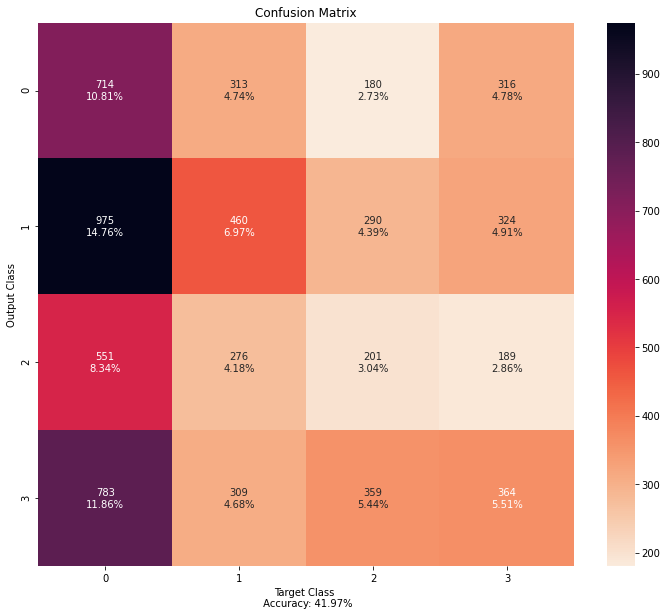

In [95]:
#make prediction and revert labeling
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

In [96]:
#fine tune the network
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)

Epoch 1/20
61/61 [==============================] - 2s 23ms/step - loss: 0.1729
Epoch 2/20
61/61 [==============================] - 1s 23ms/step - loss: 0.1655
Epoch 3/20
61/61 [==============================] - 2s 29ms/step - loss: 0.1566
Epoch 4/20
61/61 [==============================] - 2s 29ms/step - loss: 0.1465
Epoch 5/20
61/61 [==============================] - 2s 27ms/step - loss: 0.1391
Epoch 6/20
61/61 [==============================] - 2s 26ms/step - loss: 0.1363
Epoch 7/20
61/61 [==============================] - 2s 31ms/step - loss: 0.1329
Epoch 8/20
61/61 [==============================] - 2s 30ms/step - loss: 0.1307
Epoch 9/20
61/61 [==============================] - 2s 32ms/step - loss: 0.1268
Epoch 10/20
61/61 [==============================] - 2s 28ms/step - loss: 0.1240
Epoch 11/20
61/61 [==============================] - 2s 27ms/step - loss: 0.1227
Epoch 12/20
61/61 [==============================] - 2s 27ms/step - loss: 0.1208
Epoch 13/20
61/61 [==================

207/207 [==============================] - 1s 5ms/step


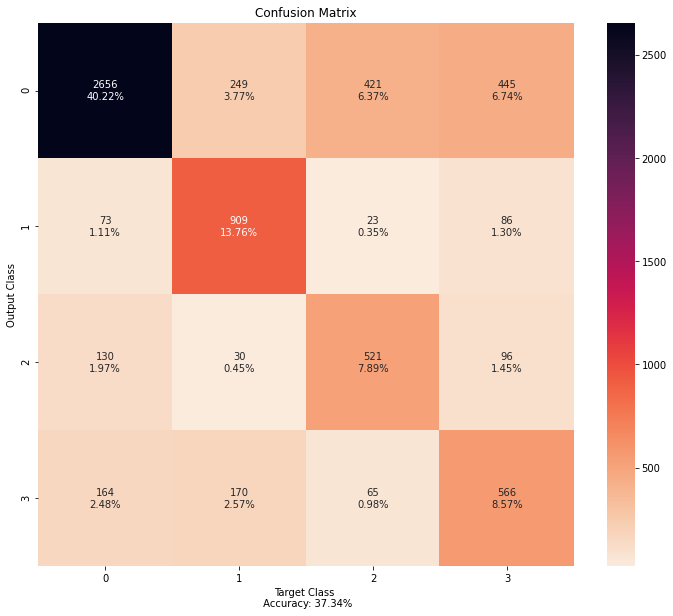

In [97]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
61/61 [==============================] - 2s 25ms/step - loss: 0.1034
Epoch 2/20
61/61 [==============================] - 2s 30ms/step - loss: 0.1046
Epoch 3/20
61/61 [==============================] - 2s 26ms/step - loss: 0.1001
Epoch 4/20
61/61 [==============================] - 1s 24ms/step - loss: 0.1001
Epoch 5/20
61/61 [==============================] - 2s 26ms/step - loss: 0.0980
Epoch 6/20
61/61 [==============================] - 2s 26ms/step - loss: 0.0965
Epoch 7/20
61/61 [==============================] - 2s 25ms/step - loss: 0.0971
Epoch 8/20
61/61 [==============================] - 2s 25ms/step - loss: 0.0947
Epoch 9/20
61/61 [==============================] - 2s 25ms/step - loss: 0.0957
Epoch 10/20
61/61 [==============================] - 2s 25ms/step - loss: 0.0935
Epoch 11/20
61/61 [==============================] - 1s 25ms/step - loss: 0.0936
Epoch 12/20
61/61 [==============================] - 2s 27ms/step - loss: 0.0923
Epoch 13/20
61/61 [==================

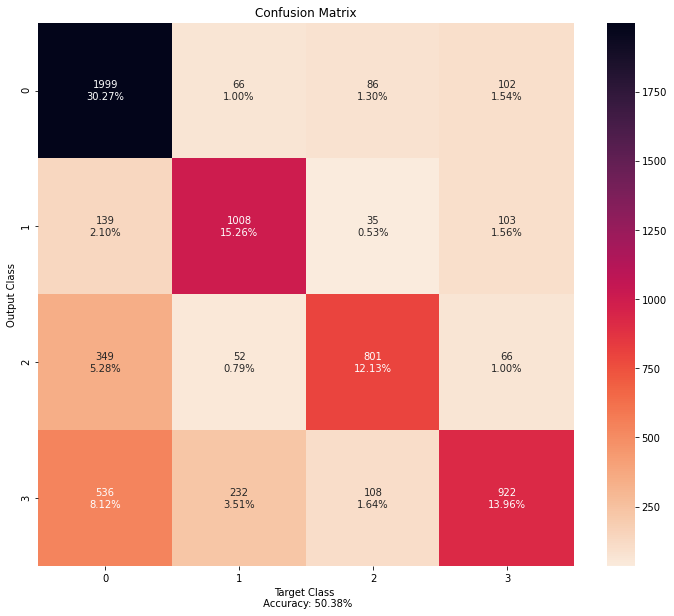

In [98]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)

y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
61/61 [==============================] - 2s 27ms/step - loss: 0.0888
Epoch 2/20
61/61 [==============================] - 2s 28ms/step - loss: 0.0863
Epoch 3/20
61/61 [==============================] - 2s 30ms/step - loss: 0.0851
Epoch 4/20
61/61 [==============================] - 2s 28ms/step - loss: 0.0825
Epoch 5/20
61/61 [==============================] - 2s 28ms/step - loss: 0.0857
Epoch 6/20
61/61 [==============================] - 2s 28ms/step - loss: 0.0878
Epoch 7/20
61/61 [==============================] - 2s 27ms/step - loss: 0.0880
Epoch 8/20
61/61 [==============================] - 2s 27ms/step - loss: 0.0848
Epoch 9/20
61/61 [==============================] - 2s 26ms/step - loss: 0.0858
Epoch 10/20
61/61 [==============================] - 2s 27ms/step - loss: 0.0827
Epoch 11/20
61/61 [==============================] - 2s 29ms/step - loss: 0.0814
Epoch 12/20
61/61 [==============================] - 2s 27ms/step - loss: 0.0830
Epoch 13/20
61/61 [==================

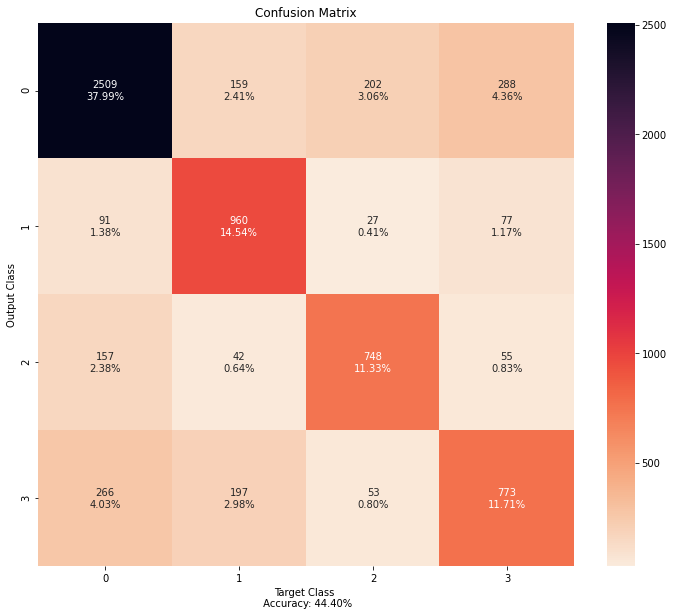

In [99]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)

y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Original Race: indian
Predicted Race: indian


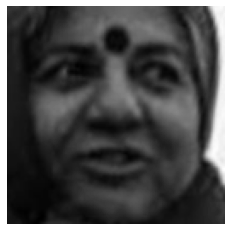

In [117]:
race_print = {0:'white', 1:'black', 2:'asian', 3:'indian'}
image_index = 4
print("Original Race:", race_print[y_test[image_index]]) 
pred = y_classified[image_index]
pred_race = race_print[round(y_classified[image_index])]
print("Predicted Race:", pred_race)
plt.axis('off')
plt.imshow(x_test[image_index].reshape(128, 128), cmap='gray');

Original Race: black
Predicted Race: indian


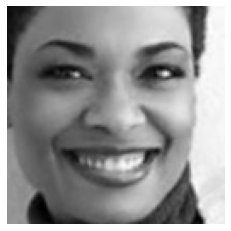

In [118]:
race_print = {0:'white', 1:'black', 2:'asian', 3:'indian'}
image_index = 6
print("Original Race:", race_print[y_test[image_index]])
pred = y_classified[image_index]
pred_race = race_print[round(y_classified[image_index])]
print("Predicted Race:", pred_race)
plt.axis('off')
plt.imshow(x_test[image_index].reshape(128, 128), cmap='gray');